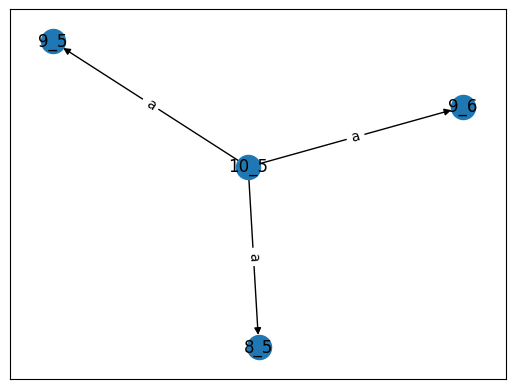

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load MDP data from Excel file
#df = pd.read_excel('mdp_data.xlsx')
df = pd.read_csv('mdp_2d_data.xls')

nx_state_var = [col for col in df.columns if col.startswith('nx') and col != 'action' and col != 'probability' and col != 'reward']
state_var = [col.replace('nx_', '') for col in nx_state_var]

# Create a directed graph
mdp_graph = nx.DiGraph()

# Add states as nodes to the graph
for index, row in df.iterrows():
    state = row[state_var]  
    state = '_'.join([str(feature) for feature in state])
    mdp_graph.add_node(state)

# Add transitions as edges to the graph
for index, row in df.iterrows():
    state = row[state_var]  
    state = '_'.join([str(feature) for feature in state])
    action = row['action']
    next_state = row[nx_state_var]  
    next_state = '_'.join([str(feature) for feature in next_state])

    mdp_graph.add_edge(state, next_state, action=action)

# Plot the MDP graph
pos = nx.spring_layout(mdp_graph)  # You can use different layout algorithms
nx.draw_networkx(mdp_graph, pos=pos, with_labels=True)

# Add edge labels
edge_labels = nx.get_edge_attributes(mdp_graph, 'action')
nx.draw_networkx_edge_labels(mdp_graph, pos=pos, edge_labels=edge_labels)

# Show the plot
plt.show()
